In [1]:
import json,os
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results = {'depth':[],'popt':[],'opt_density':[],'stdOverOptMinusMean':[],'poptBound':[],'prob':[]}

for idx in [i for i in range(150)][::-1]:
    json_path = f'./popt_result/random/{idx}.json'
    with open(json_path, 'r') as file:
        data = json.load(file)
    depths = [data['results'][i]['level'] for i in range(len(data['results']))]
    popts = [data['results'][i]['p_opt'] for i in range(len(data['results']))]
    probs = [data['results'][i]['p_opt']/data['opt_count'] for i in range(len(data['results']))]
    results['depth'] += depths
    results['popt'] += popts
    results['prob'] += probs
    results['opt_density'] += [data['opt_density']]*len(depths)
    results['stdOverOptMinusMean'] += [data['stdOverOptMinusMean']]*len(depths)
    results['poptBound'] += [data['opt_density']*(2*p+1)**2 for p in depths]

        
df = pd.DataFrame(results)
df['ratio'] = df['popt']/df['poptBound']

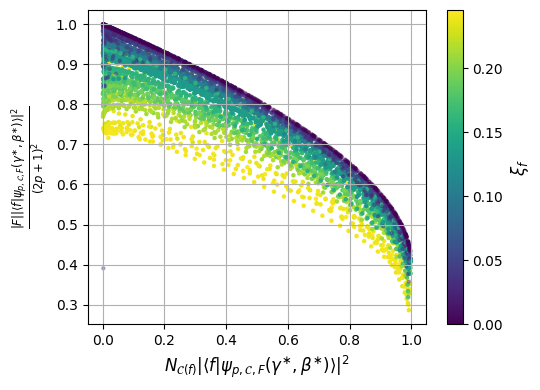

In [3]:
data = df

# Create a figure and axis
plt.figure(figsize=(5.5, 4))

# Normalize the color values based on '(opt-mean)/std'
norm = plt.Normalize(data['stdOverOptMinusMean'].min(), data['stdOverOptMinusMean'].max())

# Map 'stdOverOptMinusMean' to alpha values using a linear scale with smoothing factor
smoothing_factor = 3 # Controls how transparent the points get (reduce transparency)
alpha_values = smoothing_factor * (data['stdOverOptMinusMean'] - data['stdOverOptMinusMean'].min()) / \
               (data['stdOverOptMinusMean'].max() - data['stdOverOptMinusMean'].min())

# Ensure alpha values are in the range [0.3, 1] to avoid being too transparent
alpha_values = np.clip(alpha_values, 0.3, 1)

# Create scatter plot with color map and varying alpha values
scatter = plt.scatter(data['popt'], data['ratio'], c=data['stdOverOptMinusMean'], 
                      cmap='viridis', norm=norm, s=5, alpha=alpha_values)

# Add colorbar to the plot
cbar = plt.colorbar(scatter)
cbar.set_label(r'$\xi_f$', fontsize=12)

# Set labels and grid
plt.xlabel(r'$N_{\mathcal{C}(f)}\vert \langle f \vert \psi_{p,\mathcal{C},F}(\gamma^{\ast}, \beta^{\ast})\rangle \vert^2$', fontsize=12)
plt.ylabel(r'$\frac{|F|\vert \langle f \vert \psi_{p,\mathcal{C},F}(\gamma^{\ast}, \beta^{\ast})\rangle \vert^2}{(2p+1)^2}$', fontsize=12)
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.savefig('./figs/prob_ratio.pdf')
plt.show()
